Columns in the dataset: Index(['heart_rate', 'temperature', 'spo2', 'vibration_intensity', 'label'], dtype='object')
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



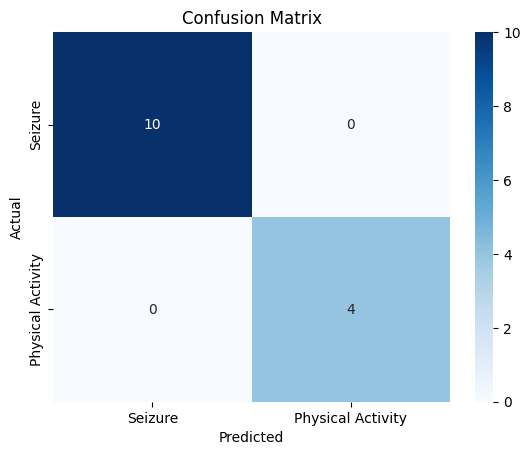

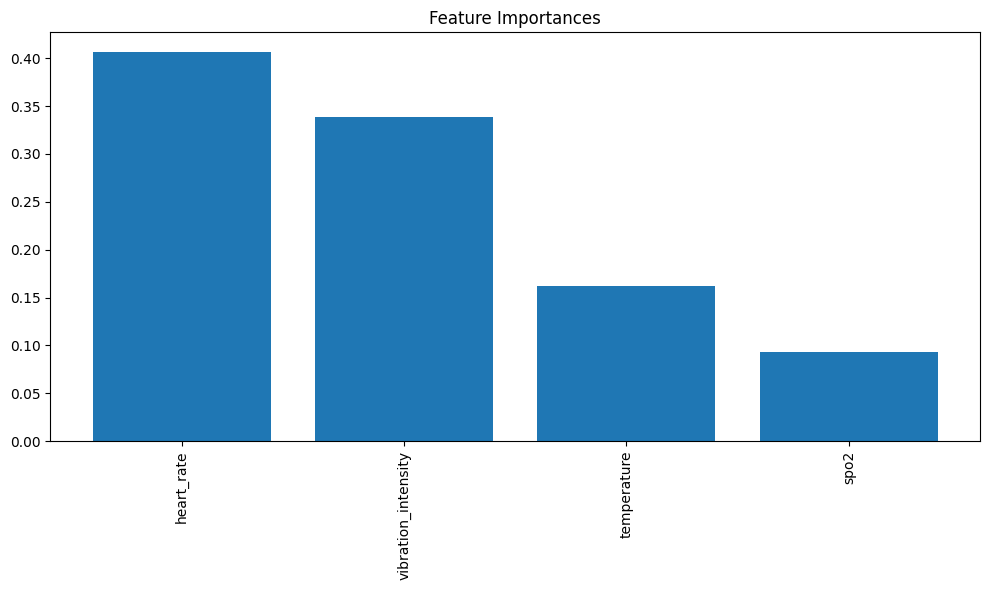

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/seizure-detection-with-physiological-data/train.csv')

# Debugging: Print the column names to find the correct feature names
print("Columns in the dataset:", data.columns)

# Replace with actual column names from the dataset
X = data[['heart_rate', 'temperature', 'spo2', 'vibration_intensity']]  # Example modification based on actual column names
y = data['label']  # Target column (label)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Seizure', 'Physical Activity'],
            yticklabels=['Seizure', 'Physical Activity'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (Optional)
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [2]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=skf)

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean cross-validation accuracy: {scores.mean():.2f}')


Cross-validation accuracy scores: [1.         0.92857143 1.         1.         1.        ]
Mean cross-validation accuracy: 0.99


In [3]:
import pandas as pd

# Load the dataset with anomalies and missing data
noisy_anomaly_testing_data = pd.read_csv('/kaggle/input/seizure-detection-with-physiological-data/test.csv')

# Display the dataset to inspect it
print(noisy_anomaly_testing_data.head())


   heart_rate  temperature  spo2  vibration_intensity label
0        87.5         36.9  97.1                0.032     0
1       114.8         37.0  90.8                0.210     1
2        91.2         36.7  95.5                0.045     0
3       129.7         37.5  88.3                0.280     1
4        69.9         36.5  99.0                0.009     0


In [4]:
# Handle missing values by removing them or filling with a strategy (mean, median, etc.)
noisy_anomaly_testing_data = noisy_anomaly_testing_data.dropna()  # Remove rows with NaN

# Separate features and labels
X_noisy_anomaly_test = noisy_anomaly_testing_data[['heart_rate', 'temperature', 'spo2', 'vibration_intensity']]
y_noisy_anomaly_test = noisy_anomaly_testing_data['label']


In [5]:
# Make predictions on the noisy anomaly test set
y_noisy_anomaly_pred = rf_model.predict(X_noisy_anomaly_test)

# Evaluate the model
noisy_anomaly_accuracy = accuracy_score(y_noisy_anomaly_test.astype(str), y_noisy_anomaly_pred.astype(str)) # Cast both arrays to strings
print(f"Noisy Anomaly Test Data Accuracy: {noisy_anomaly_accuracy * 100:.2f}%")
print("Classification Report for Noisy Anomaly Data:\n", classification_report(y_noisy_anomaly_test.astype(str), y_noisy_anomaly_pred.astype(str))) # Cast both arrays to strings

# Confusion Matrix for Noisy Anomaly Data
noisy_anomaly_conf_matrix = confusion_matrix(y_noisy_anomaly_test.astype(str), y_noisy_anomaly_pred.astype(str)) # Cast both arrays to strings
print("Confusion Matrix for Noisy Anomaly Data:\n", noisy_anomaly_conf_matrix)

Noisy Anomaly Test Data Accuracy: 96.36%
Classification Report for Noisy Anomaly Data:
                             precision    recall  f1-score   support

                         0       0.96      1.00      0.98        25
                         1       0.97      0.97      0.97        29
1   # Anomalous heart rate       0.00      0.00      0.00         1

                  accuracy                           0.96        55
                 macro avg       0.64      0.66      0.65        55
              weighted avg       0.95      0.96      0.95        55

Confusion Matrix for Noisy Anomaly Data:
 [[25  0  0]
 [ 1 28  0]
 [ 0  1  0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import pandas as pd

# New data sample
new_sample = {
    'heart_rate': 102,
    'temperature': 40,
    'spo2': 89,
    'vibration_intensity': 0.75
}

# Convert to DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Handle missing values if needed
new_sample_df = new_sample_df.dropna()  # Optional based on your handling

# Make a prediction
predicted_label = rf_model.predict(new_sample_df)

# Interpret the result
if predicted_label[0] == 0:
    print("The sample indicates Physical Activity.")
else:
    print("The sample indicates a Seizure.")


The sample indicates a Seizure.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

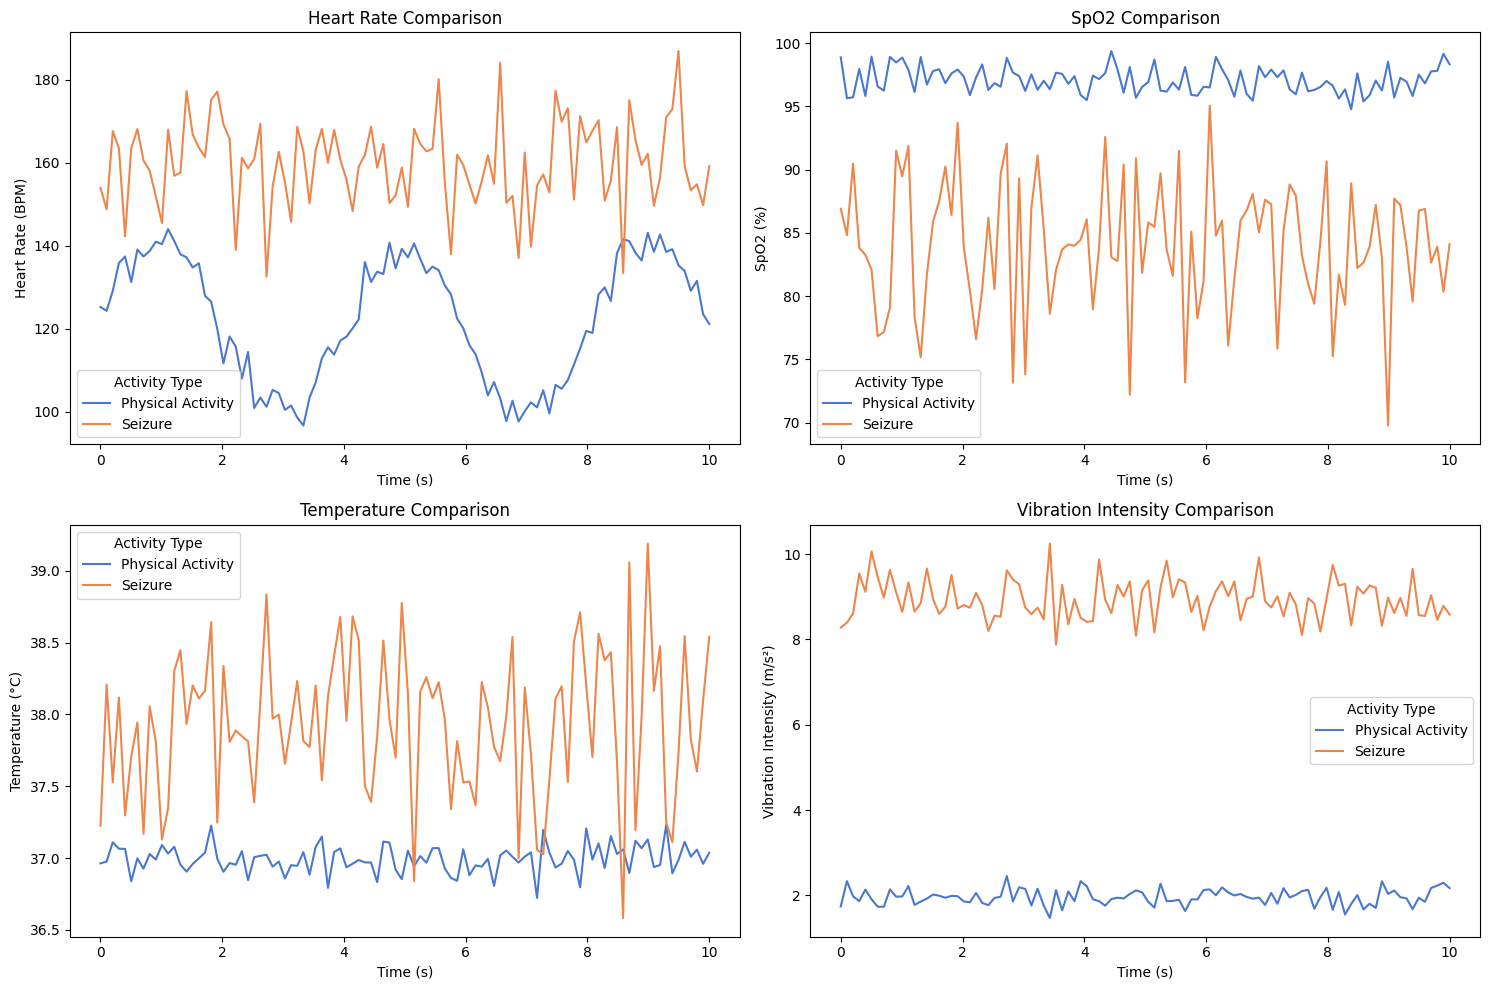

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
np.random.seed(0)

# Generate time points
time = np.linspace(0, 10, 100)  # 10 seconds with 100 samples

# Simulated physiological data for Physical Activity
heart_rate_pa = 120 + 20 * np.sin(0.5 * np.pi * time) + np.random.normal(0, 3, len(time))  # Heart rate
spo2_pa = 97 + np.random.normal(0, 1, len(time))  # SpO2
temperature_pa = 37 + np.random.normal(0, 0.1, len(time))  # Temperature
vibration_intensity_pa = 2 + np.random.normal(0, 0.2, len(time))  # Vibration intensity

# Simulated physiological data for Seizures
heart_rate_sz = 160 + np.random.normal(0, 10, len(time))  # Heart rate during seizures
spo2_sz = 85 + np.random.normal(0, 5, len(time))  # SpO2 during seizures
temperature_sz = 38 + np.random.normal(0, 0.5, len(time))  # Temperature during seizures
vibration_intensity_sz = 9 + np.random.normal(0, 0.5, len(time))  # Vibration intensity during seizures

# Create DataFrame
# Duplicate the time array to match the length of other columns
time_extended = np.concatenate([time, time])  

data = pd.DataFrame({
    'Time': time_extended,  # Use the extended time array
    'Heart Rate (BPM)': np.concatenate((heart_rate_pa, heart_rate_sz)),
    'SpO2 (%)': np.concatenate((spo2_pa, spo2_sz)),
    'Temperature (°C)': np.concatenate((temperature_pa, temperature_sz)),
    'Vibration Intensity (m/s²)': np.concatenate((vibration_intensity_pa, vibration_intensity_sz)),
    'Activity Type': ['Physical Activity'] * len(time) + ['Seizure'] * len(time)
})

# Set the figure size
plt.figure(figsize=(15, 10))

# Create subplots for each parameter
plt.subplot(2, 2, 1)
sns.lineplot(x='Time', y='Heart Rate (BPM)', hue='Activity Type', data=data, palette="muted")
plt.title('Heart Rate Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')

plt.subplot(2, 2, 2)
sns.lineplot(x='Time', y='SpO2 (%)', hue='Activity Type', data=data, palette="muted")
plt.title('SpO2 Comparison')
plt.xlabel('Time (s)')
plt.ylabel('SpO2 (%)')

plt.subplot(2, 2, 3)
sns.lineplot(x='Time', y='Temperature (°C)', hue='Activity Type', data=data, palette="muted")
plt.title('Temperature Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')

plt.subplot(2, 2, 4)
# Correct the column name for 'y'
sns.lineplot(x='Time', y='Vibration Intensity (m/s²)', hue='Activity Type', data=data, palette="muted")  
plt.title('Vibration Intensity Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Vibration Intensity (m/s²)')

plt.tight_layout()
plt.show()